# **Denoising Images Using Python (skimage, scipy)**
---

## **Overview**
This notebook demonstrates different techniques for denoising images using Python libraries scipy and skimage. Three main denoising methods are covered: Gaussian filter, Median filter, and Non-local means (NLM) denoising. These techniques are widely used for reducing noise in images without significantly blurring important details.



## **Installing PyWavelets**
- `PyWavelets` is a library required for certain wavelet-based operations in image processing and denoising. Although not directly used in this notebook, it's a dependency for some skimage functions.

In [20]:
# !pip install PyWavelets

## **1. Importing Required Libraries**
- This cell imports the necessary libraries for image reading (`io`), filtering (`scipy.ndimage`), and advanced denoising methods (`skimage.restoration`).

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import ndimage as nd
from skimage.restoration import denoise_nl_means, estimate_sigma

## **2. Loading and Displaying the Noisy Image**
- The noisy image is loaded using `io.imread()` and displayed using `plt.imshow()`. This serves as the input image for all denoising operations.

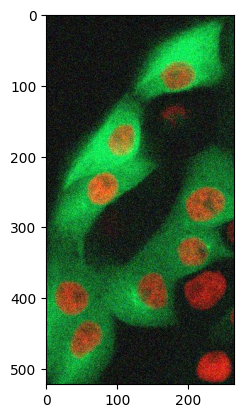

In [5]:
img = io.imread("/content/noisy_img.jpg")
plt.imshow(img);

## **3. Applying Gaussian Filter**
- The Gaussian filter is applied to the noisy image using `nd.gaussian_filter()`. This filter smoothens the image by averaging pixel values, reducing noise while slightly blurring the image.

**Parameters & Variations**:
- `sigma`: Defines the standard deviation of the Gaussian kernel, controlling the degree of smoothing. A higher sigma increases the smoothing but may also blur important image details.

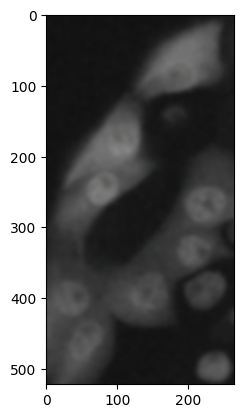

In [6]:
gaussian_img = nd.gaussian_filter(img, sigma=3)
plt.imshow(gaussian_img);

## **4. Applying Median Filter**
- The Median filter is applied using `nd.median_filter()`. It replaces each pixel's value with the median of the pixel neighborhood, effectively removing noise (especially salt-and-pepper noise) without blurring edges as much as Gaussian filtering.

**Parameters & Variations**:
- `size`: Defines the size of the neighborhood window over which the median is calculated. A larger size may result in stronger noise removal but can also increase smoothing of important image features.

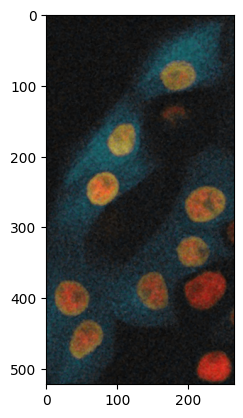

In [10]:
median_img = nd.median_filter(img, size=3)
plt.imshow(median_img);

## **5. Estimating Noise Standard Deviation**
- `estimate_sigma()` estimates the noise standard deviation (sigma_est) in the image. This value is essential for the next step, where it will be used in the Non-local means denoising method to balance noise reduction and detail preservation.

**Parameters & Variations**:
- `channel_axis`: Specifies that the last axis of the image corresponds to the color channels (e.g., -1 for RGB channels and None for Grayscale images).

In [17]:
sigma_est = np.mean(estimate_sigma(img, channel_axis=-1))

## **6. Applying Non-local Means Denoising**
- Non-local means (NLM) denoising is applied to the noisy image using the estimated noise standard deviation (`sigma_est`). NLM is an advanced technique that reduces noise by averaging similar patches of the image, even if they are far apart. This method preserves fine details and textures better than local filters like Gaussian and median filters.

**Parameters & Variations**:
- `h=1.15 * sigma_est`: The h parameter controls the degree of filtering based on the estimated noise level. A higher value results in stronger noise reduction but can remove more image details.
- `fast_mode=False`: Ensures high-quality denoising by disabling the faster but less accurate mode.
- `patch_size`: Defines the size of the patches used for comparison in NLM. A larger patch size considers more surrounding pixels, which can improve denoising in highly textured regions.
- `patch_distance`: Defines the search radius around each pixel to find similar patches. A larger distance considers a wider region for finding similar patches.

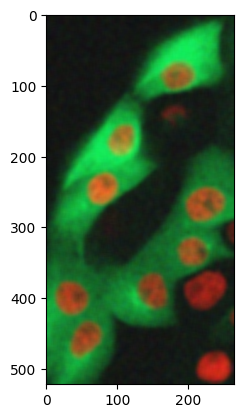

In [19]:
non_local_means_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False, patch_size=5, patch_distance=3, channel_axis=-1)
plt.imshow(non_local_means_img);